# Fashion Mnist using Knn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./Datasets/fashion-mnist_train.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=df.values

In [5]:
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')

In [6]:
fashion_data = df.values
fashion_data.shape

limit = 4000
X = fashion_data[:limit, 1:]
Y = fashion_data[:limit, 0]
print(X.shape)
print(Y.shape)


(4000, 784)
(4000,)


In [7]:
split = int(X.shape[0]*0.8)
X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

print(Y_train.shape)
print(X_train.shape)
print(Y_test.dtype)

(3200,)
(3200, 784)
int64


2


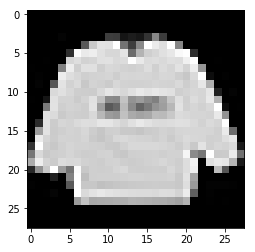

9


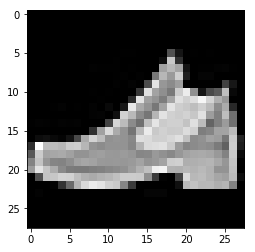

6


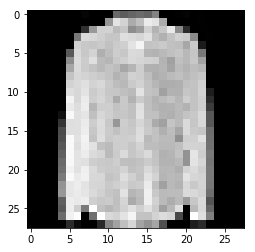

0


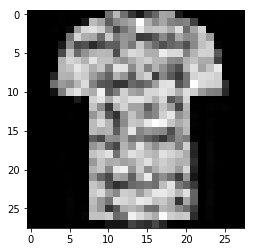

3


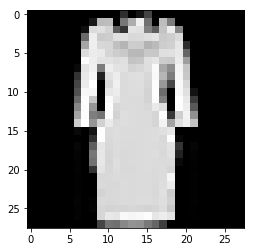

In [8]:
for i in range(5):
    drawImg(X_train[i])
    print(Y_train[i])
    plt.show()

In [9]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Euclidean distance

In [10]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Knn algorithm

In [11]:
def knn(X,Y,query_point,K=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(query_point,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:K]
    vals=np.array(vals)
    #print(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return int(pred)

# Prediction

In [19]:
x=[]
for i in range(40,50):
    x.append(knn(X_train,Y_train,X_test[i]))

In [20]:
print(x)

[3, 2, 2, 4, 5, 6, 6, 0, 1, 9]


3


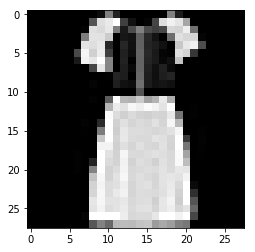

2


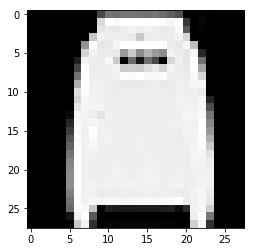

2


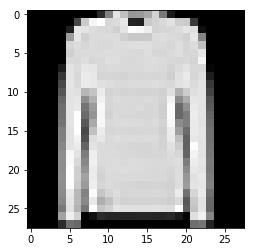

4


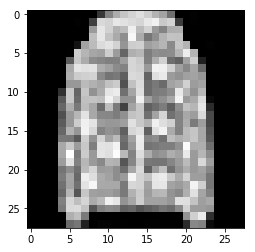

5


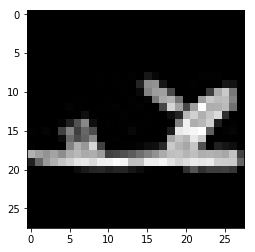

6


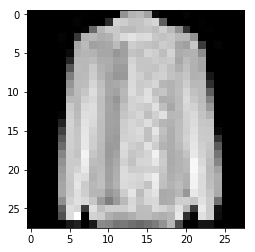

6


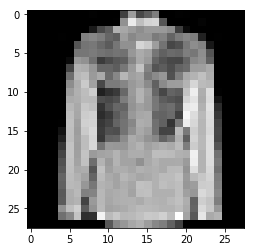

0


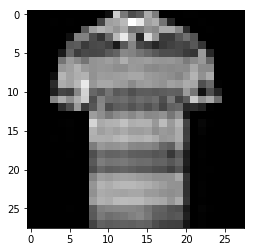

1


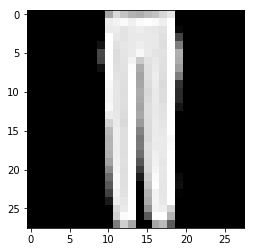

5


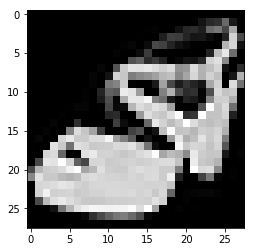

In [21]:
for i in range(40,50):
    print(Y_test[i])
    drawImg(X_test[i])
    plt.show()

# Accuracy

In [15]:
cnt = 0
for i in range(100):
    pred = knn(X_train,Y_train,X_test[i])
    if(pred==Y_test[i]):
        cnt +=1
        
print(cnt/100)

0.83
